Grafieken staan in:
https://www.overleaf.com/project/5ec1435690cbee000145eec4

In [1]:
import matplotlib.pyplot as plt
import numpy as np
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23
sigma = 5.68e-8
kw = 2.89777e-3

In [2]:
def planck(wav, T):
    """stralingsdichtheid Wm^-2 per nm"""
    a = 2.0*np.pi*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity / 1e9  # per nm


<ipython-input-2-a3658690f4ef>:5: RuntimeWarning: overflow encountered in exp
  intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )


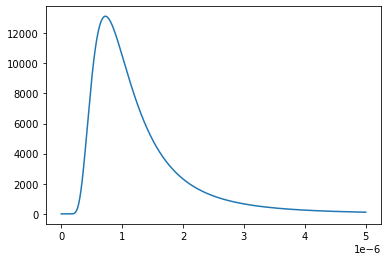

In [3]:
MAX = 5e-6  # 5000 nm
T = 4000
wavelengths = np.arange(1e-9, MAX, 1e-9) 
def intensity(T):
    return planck(wavelengths, T)

plt.plot(wavelengths, intensity(T))
plt.show()

In [4]:

l_max = kw / T
print(f"{T} K: {l_max/1e-9} nm")
print("Opp onder grafiek", np.sum(planck(wavelengths, T)))
print("I Stefan-Boltzman", 5.68e-8*(T)**4)
print(f"maximum: {planck(l_max, T)}")

4000 K: 724.4425 nm
Opp onder grafiek 14259566.615781762
I Stefan-Boltzman 14540800.0
maximum: 13118.060966913541


<ipython-input-2-a3658690f4ef>:5: RuntimeWarning: overflow encountered in exp
  intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )


In [5]:
from artist import Plot

# make graph
graph = Plot()

# make Plot
graph.plot(wavelengths*1e9, intensity(T), mark=None, linestyle='red, smooth, very thick')

# NL getallen 1000 ipv 1,000 voor duizend en komma voor decimaalteken
graph.set_axis_options('/pgf/number format/.cd,\n'
                       'use comma,\n'
                       '1000 sep={},')

graph.set_xlimits(0, 5000)
graph.set_ylimits(0, 4500)

 # set scale: 1cm equals 10 units along the x-axis
graph.set_xscale(cm=500)
# set scale: 1cm equals 1 unit along the y-axis
graph.set_yscale(cm=500)

# set ticks at every unit along the y axis
graph.set_yticks(np.arange(0, 5000, 500))
graph.set_xticks(np.arange(0, 6000, 1000))

graph.set_xlabel(r'golflengte $\left[\si{\nano\meter}\right]$')
graph.set_ylabel(r'Intensiteit-dichtheid $\left[\si{\watt'
                    r'\per\meter\squared\per\nano\meter}\right]$')

# set graph paper
graph.use_graph_paper()


# save graph to file
graph.save(f'stralingskromme{T}K')

<ipython-input-2-a3658690f4ef>:5: RuntimeWarning: overflow encountered in exp
  intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
